In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os 
from dotenv import load_dotenv
import mysql.connector
import seaborn as sns

In [14]:
# Load environment variables from .env file
load_dotenv('../.env')
'...' + os.getenv('MYSQL_HOST')[25:]

'...evrb.us-east-1.rds.amazonaws.com'

In [3]:
# Get MySQL credentials from environment variables
host = os.getenv('MYSQL_HOST')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

# Establish the connection
connection = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

## load data

In [4]:
%%time

# query the database
query = """
SELECT id, observed, route_id, param, unit, value, state
FROM `traffic-air-quality`.air_quality;
"""

df = pd.read_sql(query, connection)
df

<timed exec>:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.


CPU times: user 199 ms, sys: 24.5 ms, total: 223 ms
Wall time: 1.29 s


,id,observed,route_id,param,unit,value,state
0,1,2024-04-27 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.32,provisorisch
1,2,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.19,provisorisch
2,5,2024-04-28 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.16,provisorisch
3,6,2024-04-30 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.23,provisorisch
4,7,2024-04-29 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.20,provisorisch
...,...,...,...,...,...,...,...
14971,17423,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO,µg/m3,1.55,provisorisch
14972,17424,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO2,µg/m3,14.65,provisorisch
14973,17425,2024-05-21 23:00:00,Zch_Rosengartenstrasse,O3,µg/m3,60.79,provisorisch
14974,17426,2024-05-21 23:00:00,Zch_Rosengartenstrasse,PM10,µg/m3,4.36,provisorisch


In [5]:
def min_max_scale(x):
    mn, mx = x.min(), x.max()
    x_scaled = (x - mn) / (mx - mn)
    return x_scaled

In [6]:
df.rename(columns={'value': 'original_value', 'unit': 'original_value_unit'}, inplace=True)
df.drop('state', axis=1, inplace=True)
df

,id,observed,route_id,param,original_value_unit,original_value
0,1,2024-04-27 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.32
1,2,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.19
2,5,2024-04-28 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.16
3,6,2024-04-30 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.23
4,7,2024-04-29 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.20
...,...,...,...,...,...,...
14971,17423,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO,µg/m3,1.55
14972,17424,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO2,µg/m3,14.65
14973,17425,2024-05-21 23:00:00,Zch_Rosengartenstrasse,O3,µg/m3,60.79
14974,17426,2024-05-21 23:00:00,Zch_Rosengartenstrasse,PM10,µg/m3,4.36


In [7]:
df['value'] = df.groupby('param')['original_value'].transform(min_max_scale)
df

,id,observed,route_id,param,original_value_unit,original_value,value
0,1,2024-04-27 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.32,0.625000
1,2,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.19,0.218750
2,5,2024-04-28 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.16,0.125000
3,6,2024-04-30 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.23,0.343750
4,7,2024-04-29 00:00:00,Zch_Stampfenbachstrasse,CO,mg/m3,0.20,0.250000
...,...,...,...,...,...,...,...
14971,17423,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO,µg/m3,1.55,0.106174
14972,17424,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO2,µg/m3,14.65,0.197383
14973,17425,2024-05-21 23:00:00,Zch_Rosengartenstrasse,O3,µg/m3,60.79,0.447281
14974,17426,2024-05-21 23:00:00,Zch_Rosengartenstrasse,PM10,µg/m3,4.36,0.016303


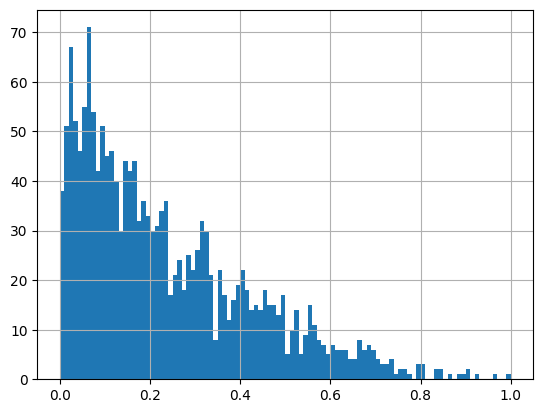

<Axes: >

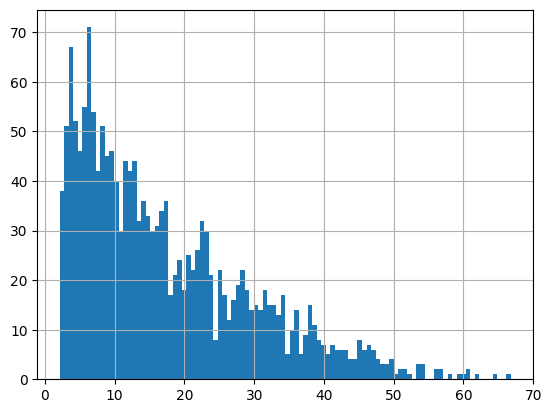

In [8]:
df.loc[df.param=='NO2','value'].hist(bins=100)
plt.show()
df.loc[df.param=='NO2','original_value'].hist(bins=100)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11232 entries, 0 to 11231
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   11232 non-null  int64         
 1   observed             11232 non-null  datetime64[ns]
 2   route_id             11232 non-null  object        
 3   param                11232 non-null  object        
 4   original_value_unit  11232 non-null  object        
 5   original_value       11232 non-null  float64       
 6   value                11232 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 614.4+ KB


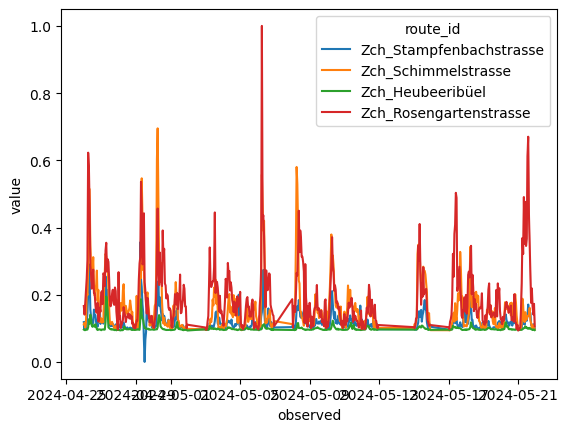

In [12]:
df_plot = df.loc[df.param == 'NO',:]

sns.lineplot(
    df_plot,
    x = 'observed',
    y = 'value',
    hue = 'route_id'
);

In [16]:
# Get MySQL credentials from environment variables
host_dw = os.getenv('MYSQL_DW_HOST')
user_dw = os.getenv('MYSQL_DW_USER')
password_dw = os.getenv('MYSQL_DW_PASSWORD')
database_dw = os.getenv('MYSQL_DW_DATABASE')

# Establish the connection
connection_dw = mysql.connector.connect(
    host=host_dw,
    user=user_dw,
    password=password_dw,
    database=database_dw
)

# query the database
query = """
SELECT id, observed, route_id, param, value
FROM `traffic-air-quality`.air_quality;
"""

df_dw = pd.read_sql(query, connection_dw)
df_dw

/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_37046/3542751491.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dw = pd.read_sql(query, connection_dw)


,id,observed,route_id,param,value
0,1,2024-04-27 00:00:00,Zch_Stampfenbachstrasse,CO,0.625000
1,2,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,CO,0.218750
2,5,2024-04-28 00:00:00,Zch_Stampfenbachstrasse,CO,0.125000
3,6,2024-04-30 00:00:00,Zch_Stampfenbachstrasse,CO,0.343750
4,7,2024-04-29 00:00:00,Zch_Stampfenbachstrasse,CO,0.250000
...,...,...,...,...,...
13099,16799,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO,0.106174
13100,16800,2024-05-21 23:00:00,Zch_Rosengartenstrasse,NO2,0.197383
13101,16801,2024-05-21 23:00:00,Zch_Rosengartenstrasse,O3,0.447281
13102,16802,2024-05-21 23:00:00,Zch_Rosengartenstrasse,PM10,0.016303


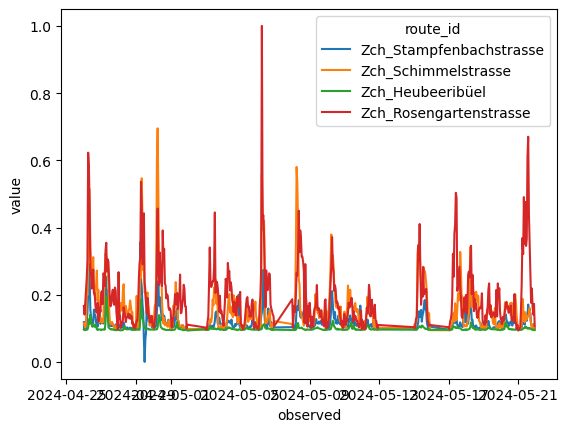

In [17]:
df_plot = df_dw.loc[df_dw.param == 'NO',:]

sns.lineplot(
    df_plot,
    x = 'observed',
    y = 'value',
    hue = 'route_id'
);

In [21]:
# query the database
query = """
SELECT observed, station_id, value
FROM `traffic-air-quality`.traffic;
"""

df_traffic = pd.read_sql(query, connection_dw)
df_traffic

/var/folders/3p/zn615dls2gv0xhj_cn94h4_h0000gn/T/ipykernel_37046/2481786199.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_traffic = pd.read_sql(query, connection_dw)


,observed,station_id,value
0,2024-04-25 13:00:00,Zch_Heubeeribüel,0.146278
1,2024-04-25 13:00:00,Zch_Rosengartenbrücke,0.171616
2,2024-04-25 13:00:00,Zch_Stampfenbachstrasse,0.119925
3,2024-04-25 13:00:00,Zch_Rosengartenstrasse,0.332092
4,2024-04-25 13:00:00,Zch_Schimmelstrasse,0.352152
...,...,...,...
11390,2024-05-22 21:00:00,CH:0383,0.000000
11391,2024-05-22 21:00:00,CH:0562,0.258278
11392,2024-05-22 21:00:00,CH:0577,0.119205
11393,2024-05-22 21:00:00,CH:0581,0.205298


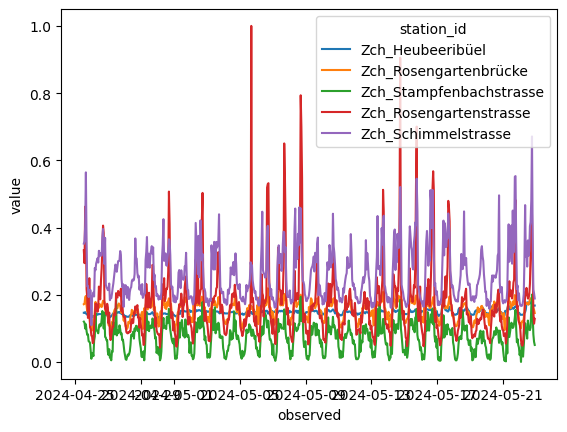

In [23]:
df_plot = df_traffic.loc[df_traffic.station_id.str.contains('Zch_'),:]

sns.lineplot(
    df_plot,
    x = 'observed',
    y = 'value',
    hue = 'station_id'
);

In [27]:
df_merge = df_traffic.merge(df_dw, left_on=['observed', 'station_id'], right_on=['observed', 'route_id'], suffixes=('_traffic', '_air'))
df_merge

,observed,station_id,value_traffic,id,route_id,param,value_air
0,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,0.009468,2,Zch_Stampfenbachstrasse,CO,0.218750
1,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,0.009468,9,Zch_Stampfenbachstrasse,SO2,0.560510
2,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,0.009468,20,Zch_Stampfenbachstrasse,NOx,0.130319
3,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,0.009468,28,Zch_Stampfenbachstrasse,NO,0.118484
4,2024-04-26 00:00:00,Zch_Stampfenbachstrasse,0.009468,34,Zch_Stampfenbachstrasse,NO2,0.311470
...,...,...,...,...,...,...,...
13073,2024-05-21 23:00:00,Zch_Heubeeribüel,0.144322,16793,Zch_Heubeeribüel,NO,0.094730
13074,2024-05-21 23:00:00,Zch_Heubeeribüel,0.144322,16794,Zch_Heubeeribüel,NO2,0.003079
13075,2024-05-21 23:00:00,Zch_Heubeeribüel,0.144322,16795,Zch_Heubeeribüel,O3,0.660393
13076,2024-05-21 23:00:00,Zch_Heubeeribüel,0.144322,16796,Zch_Heubeeribüel,PM10,0.008659


In [41]:
df_plot = df_merge.loc[df_merge.param == 'NO']
df_plot = pd.melt(df_plot, id_vars=['station_id', 'observed'], value_vars=['value_traffic', 'value_air'])

df_plot

,station_id,observed,variable,value
0,Zch_Stampfenbachstrasse,2024-04-26 00:00:00,value_traffic,0.009468
1,Zch_Rosengartenstrasse,2024-04-26 00:00:00,value_traffic,0.078340
2,Zch_Heubeeribüel,2024-04-26 00:00:00,value_traffic,0.132583
3,Zch_Schimmelstrasse,2024-04-26 00:00:00,value_traffic,0.109353
4,Zch_Stampfenbachstrasse,2024-04-26 01:00:00,value_traffic,0.025247
...,...,...,...,...
4019,Zch_Heubeeribüel,2024-05-21 22:00:00,value_air,0.096749
4020,Zch_Schimmelstrasse,2024-05-21 23:00:00,value_air,0.096461
4021,Zch_Stampfenbachstrasse,2024-05-21 23:00:00,value_air,0.100404
4022,Zch_Rosengartenstrasse,2024-05-21 23:00:00,value_air,0.106174


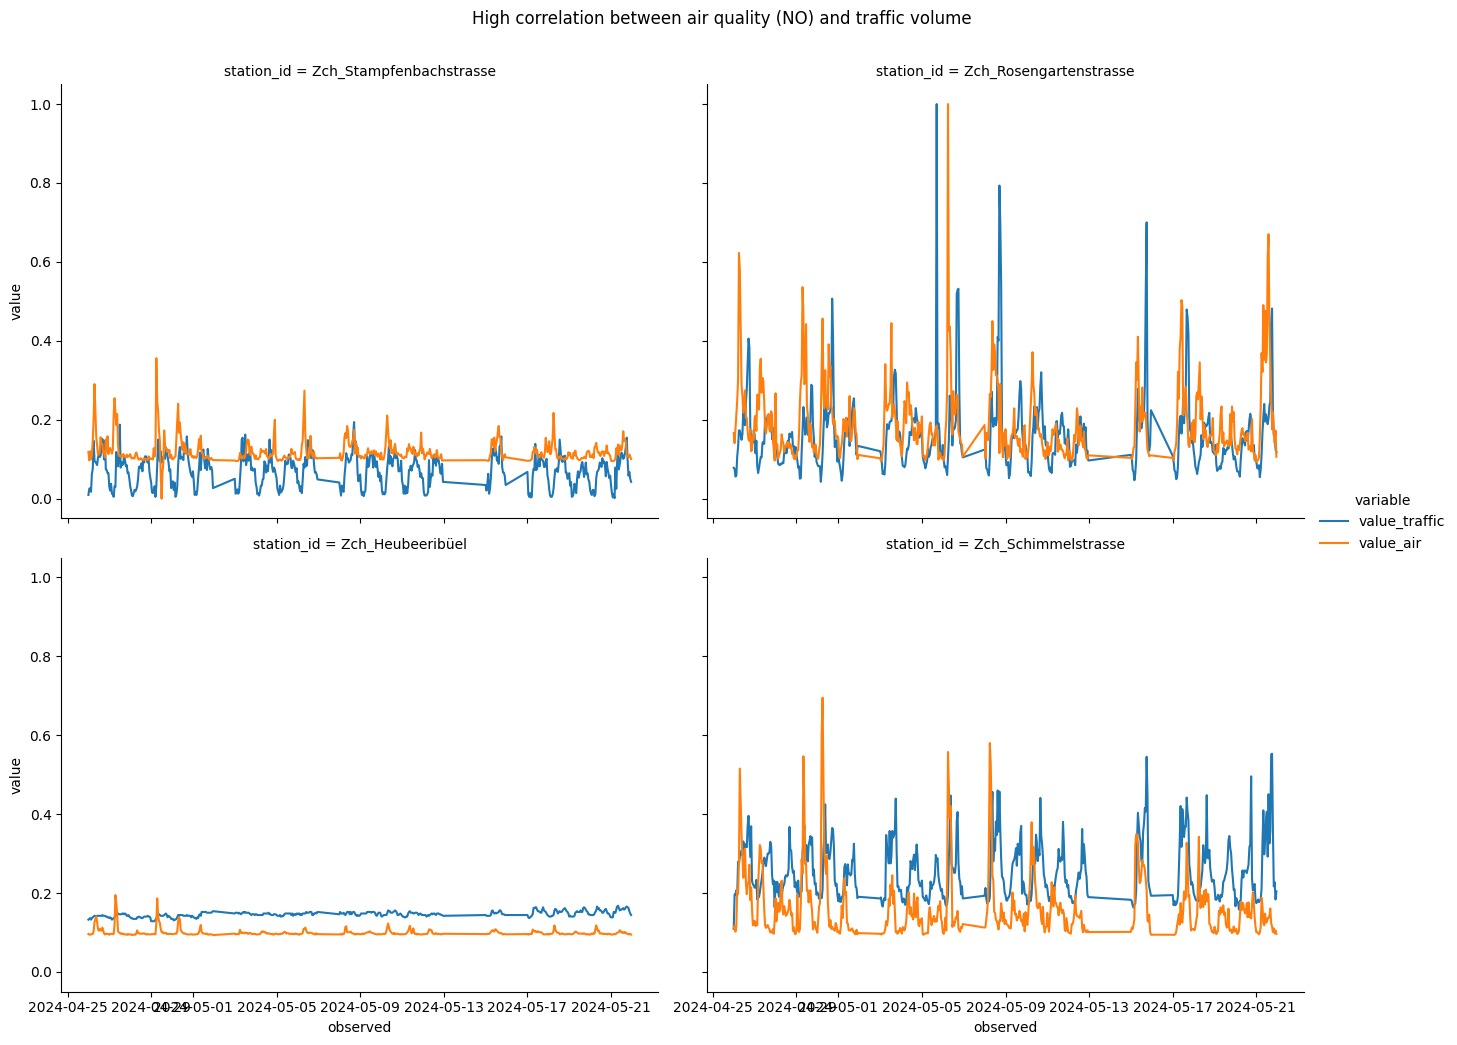

In [63]:
g = sns.relplot(
    df_plot,
    x = 'observed',
    y = 'value',
    hue = 'variable',
    col = 'station_id',
    kind = 'line',
    col_wrap = 2,
    aspect = 1.33
)
plt.suptitle('High correlation between air quality (NO) and traffic volume', y=1.04);